In [1]:
# starting with importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
conv_data= pd.read_csv('conversion_data.csv')  #Loading Data

In [3]:
conv_data.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
print(conv_data.country.unique())# checking unique values for country
print(conv_data.source.unique()) # checking unique values for source
print(conv_data.converted.unique()) # checking unique values for converted

['UK' 'US' 'China' 'Germany']
['Ads' 'Seo' 'Direct']
[0 1]


In [5]:
conv_data.isnull().sum()   #checking null values 
#There no NA values, so we don’t have to deal with empty values.

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [6]:
# Retrieving all the information about the dataset

print(conv_data.info())
print(conv_data.describe())
print(conv_data.groupby(['country']).size())
print(conv_data.groupby(['source']).size())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB
None
                 age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.685465             4.872966       0.032258
std         8.271802       0.464331             3.341104       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50

In [7]:
# Checking the conversion Rate

Conv_rate = (sum(conv_data['converted'])/len(conv_data['converted']))*100
print('The percentage of converted users is',round(Conv_rate,3),'%')

The percentage of converted users is 3.226 %


#### Some preliminary insights.

1) The user base is primarily young, with up to 75% of users in their mid-30s.

2) While the company's core market is the United States, it has a small client base in the United Kingdom.

3) The average conversion rate is 3.2%. So,if there are 100 users on the website, about three will buy the product.

<AxesSubplot:>

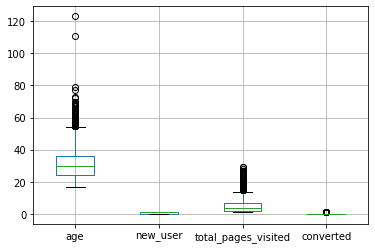

In [8]:
conv_data.boxplot()

#### Insight: we can see some outliers from the above plot.

In [9]:
#We see that the max age is 123 . Lets try to get rid of the outliers
## For age column
Q1age = conv_data.age.quantile(0.25)
Q3age = conv_data.age.quantile(0.75)
IQRage  = Q3age - Q1age

In [10]:
## Dropping outliers
conv_data.drop(conv_data[conv_data['age'] > (Q3age + 1.5*IQRage)].index, inplace = True)

In [11]:
print(len(conv_data))

314650


<AxesSubplot:xlabel='converted', ylabel='count'>

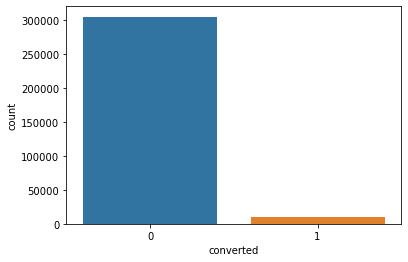

In [12]:
import warnings
warnings.filterwarnings("ignore")
sns.countplot(conv_data['converted'])

[Text(0.5, 1.0, 'Conversion from each Country')]

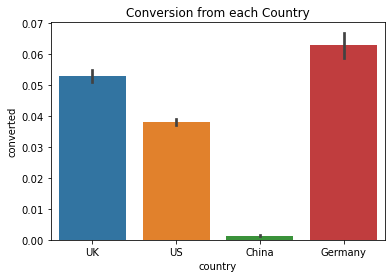

In [13]:
sns.barplot(x='country',y='converted',data=conv_data).set(title='Conversion from each Country')

##### Insight: The Chinese user are converting at a significantly lower rate than users from other countries.

[Text(0.5, 1.0, 'Conversion from each source')]

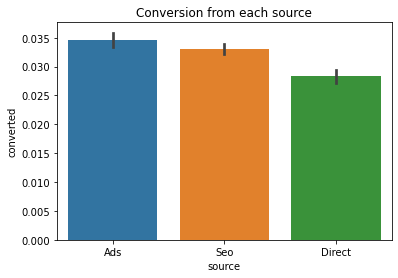

In [14]:
sns.barplot(x='source',y='converted',data=conv_data).set(title='Conversion from each source')

##### Insight: Most people are coming from Ads, followed by Seo, and then direct source.

[Text(0.5, 1.0, 'Box Plot of Age')]

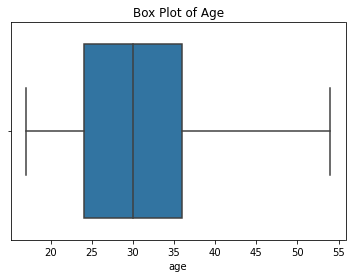

In [15]:
sns.boxplot(conv_data['age']).set(title='Box Plot of Age')

##### Insight: Majority of the users are between the age group of 23 to 37 & the maximum age is now 55 since all the outliers are removed 

[Text(0.5, 1.0, 'Total Pages Visited vs Age')]

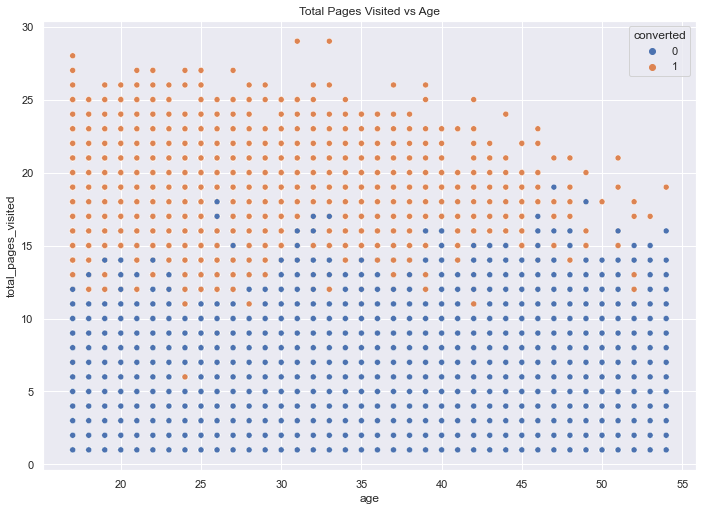

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=conv_data, x="age", y="total_pages_visited", hue="converted").set(title='Total Pages Visited vs Age')

##### Insight: Users who have visited 20 or more pages defintely converted.
##### Insight: Conversion rate is better in young age group. Conversion rate decreases  after  mid 30's

[Text(0.5, 1.0, 'Conversion by Age')]

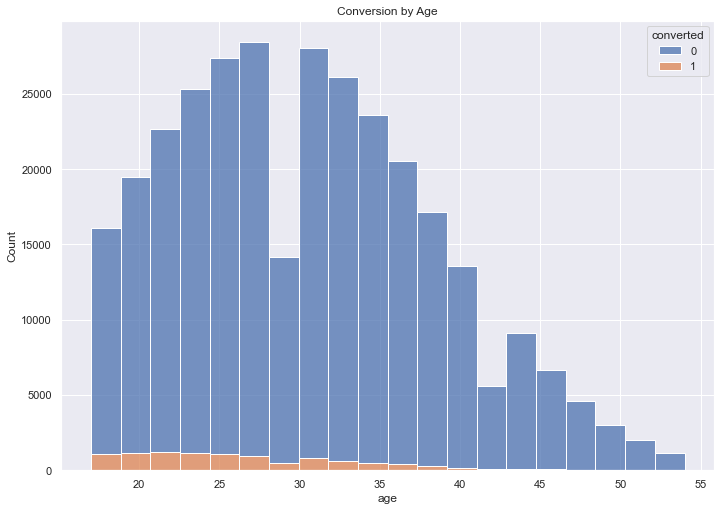

In [17]:
#sns.countplot(conv_data['age'],bin =10).set(title='Conversion from each source')
sns.histplot(conv_data,x="age", hue="converted",multiple="stack",bins =20).set(title='Conversion by Age')

##### Insight: There is no conversion rate among users above 40years of age 

### Q1. Predict conversion rate

Lets first create dummy variable for categorical data. 

In [18]:
var_dummy = pd.get_dummies(conv_data[['country','source',]] , drop_first = True)
#keeping baseline for country as China and Ads for Source

In [19]:
var_dummy

,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,0,1,0,0,0
1,0,0,1,0,1
2,0,0,1,0,1
3,0,0,0,0,1
4,0,0,1,0,1
...,...,...,...,...,...
316195,0,0,1,0,0
316196,0,0,1,1,0
316197,0,0,0,0,0
316198,0,0,1,0,1


In [20]:
conv_data = pd.concat([conv_data , var_dummy] , axis =1) #concatinating the dummy variable

In [21]:
conv_data

,country,age,new_user,source,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,UK,25,1,Ads,1,0,0,1,0,0,0
1,US,23,1,Seo,5,0,0,0,1,0,1
2,US,28,1,Seo,4,0,0,0,1,0,1
3,China,39,1,Seo,5,0,0,0,0,0,1
4,US,30,1,Seo,6,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0,0,0,1,0,0
316196,US,27,1,Direct,6,0,0,0,1,1,0
316197,China,25,0,Ads,4,0,0,0,0,0,0
316198,US,22,0,Seo,4,0,0,0,1,0,1


In [22]:
del conv_data['country']
del conv_data['source']

In [23]:
conv_data

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,1,0,0
316196,27,1,6,0,0,0,1,1,0
316197,25,0,4,0,0,0,0,0,0
316198,22,0,4,0,0,0,1,0,1


#### Now using Random forest classifer to predict the conversion rate 
for this I will split my data into training and Testing. I will run RF algorithm on training dataset and test the prediction rate on Testing data set 

In [24]:
y = conv_data['converted']
X = conv_data[['age','new_user','total_pages_visited','country_Germany','country_UK',
                   'country_US' ,'source_Direct','source_Seo']]

In [25]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, 
                                                    random_state=100)

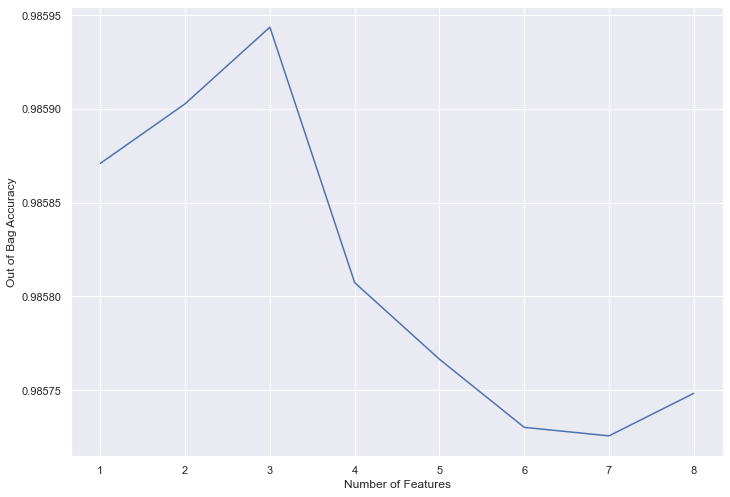

In [26]:
from sklearn.ensemble import RandomForestClassifier
Features = range(1,9)
oob_score_RF = []
for i in Features:
        RFClass = RandomForestClassifier(n_estimators = 1000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 10, #Minimum number of observations at each terminal node
                           oob_score = True,
                           random_state = 24,
                           n_jobs = -1)
        RFClass.fit(X_train,y_train)  
        oob_score_RF.append(RFClass.oob_score_)

plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Accuracy")
plt.show()

In [27]:
max(oob_score_RF)

0.9859435654128169

In [28]:
Max_X = Features[np.argmax(oob_score_RF)]
print(Max_X)

3


In [29]:
#using Max_X feature for training our model 
# random forest model creation
RFClass = RandomForestClassifier(n_estimators = 1000, 
                                 max_features = 3,
                                 min_samples_leaf = 10,
                                 oob_score = True,
                                 random_state = 24,
                                 n_jobs = -1)
RFClass.fit(X_train,y_train)
print("Out of Bag Accuracy  = %f" %RFClass.oob_score_)
scores = cross_val_score(RFClass, X, y, cv = 10)
print("Cross-validation Accuracy = %f" %scores.mean())

# predictions
rfc_predict = RFClass.predict(X_test)

Out of Bag Accuracy  = 0.985944
Cross-validation Accuracy = 0.985787


In [30]:
confmat = confusion_matrix(y_test, rfc_predict)
TN = confmat[0,0] #True Negative
FN = confmat[1,0] #False Negative
FP = confmat[0,1] #False Positive
TP = confmat[1,1] #True Positive

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

print("=== Confusion Matrix ===")
print(confmat)
print('\n')

print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

print("=== All CV Scores ===")
print(scores)
print('\n')


print("Cross-validation Accuracy = %f" %scores.mean())

=== Confusion Matrix ===
[[90936   339]
 [ 1018  2102]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91275
           1       0.86      0.67      0.76      3120

    accuracy                           0.99     94395
   macro avg       0.93      0.84      0.87     94395
weighted avg       0.98      0.99      0.98     94395



=== All CV Scores ===
[0.9862069  0.98525346 0.98544414 0.98499921 0.98668362 0.98518989
 0.9868743  0.98538058 0.98553949 0.98630224]


Cross-validation Accuracy = 0.985787


In [32]:
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':RFClass.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

,feature,importance
2,total_pages_visited,0.874079
0,age,0.048532
1,new_user,0.042784
5,country_US,0.011097
4,country_UK,0.010315
3,country_Germany,0.007321
7,source_Seo,0.003248
6,source_Direct,0.002625


In [33]:
Err = float(FP + FN)/(FP + FN + TP + TN) #Prediction Error
Acc = float(TP + TN)/(FP + FN + TP + TN) #Prediction Accuracy
FPR = float(FP)/(FP + TN)  #False Positive Rate
TNR = float(TN)/(FP + TN)  #True Negative Rate
TPR = float(TP)/(FN + TP)  #True Positive Rate
FNR = float(FN)/(FN + TP)  #False Negative Rate
print("False Positive Rate = %f" %FPR)
print("False Negative Rate = %f" %FNR)
print("True Positive Rate = %f" %TPR)
print("True Negative Rate = %f" %TNR)
print("Misclassification Error = %f" %Err)
print("Accuracy = %f" %Acc)

False Positive Rate = 0.003714
False Negative Rate = 0.326282
True Positive Rate = 0.673718
True Negative Rate = 0.996286
Misclassification Error = 0.014376
Accuracy = 0.985624


### Q2. •	Come up with recommendations for the product team and the marketing team to improve conversion rate
##### Using DecisionTreeClassifier for Interpreting the model

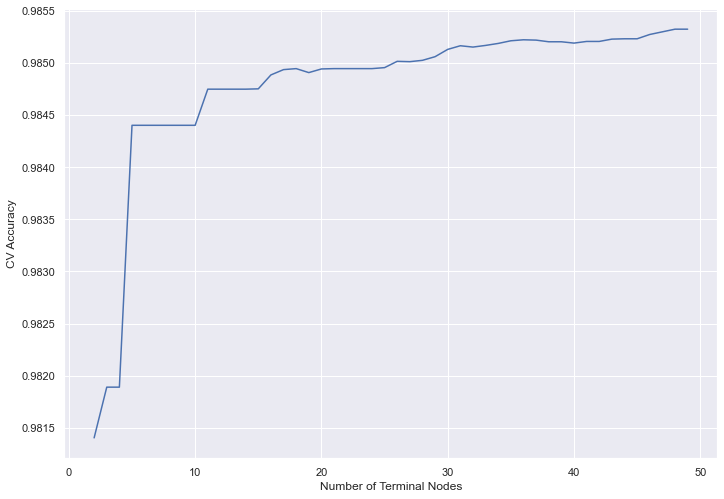

In [34]:
Maximum_Terminal_Nodes = range(2,50)
score = []
for i in Maximum_Terminal_Nodes:
    TreeClass = DecisionTreeClassifier(max_leaf_nodes = i, 
                                       min_samples_leaf = 5, 
                                       random_state = 24)
    score.append((cross_val_score(TreeClass, X, y, cv=10, scoring = 'accuracy')).mean())

plt.plot(Maximum_Terminal_Nodes, score)
plt.xlabel("Number of Terminal Nodes")
plt.ylabel("CV Accuracy")
plt.show()

In [35]:
CV_MSE_Max = np.argmax(score)
Maximum_Terminal_Node = Maximum_Terminal_Nodes[CV_MSE_Max]
print("The best option for maximum terminal node is %i which results in accuracy = %f" %(Maximum_Terminal_Node, np.max(score)))

The best option for maximum terminal node is 48 which results in accuracy = 0.985323


In [36]:
# keeping the best maximum terminal node value for fitting the model

treereg = DecisionTreeClassifier(min_samples_leaf = 5, max_leaf_nodes = 48,
                                random_state = 24)
treereg.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':treereg.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

,feature,importance
2,total_pages_visited,0.905658
1,new_user,0.061689
0,age,0.020823
3,country_Germany,0.005235
5,country_US,0.003944
4,country_UK,0.002651
6,source_Direct,0.000000
7,source_Seo,0.000000


##### Insight: Total_pages_visited , new_user and age are important features of the model. 

### Based on my findings, I propose the following to the marketing team.

1) Chinese users have an extremely low conversion rate. The company must improve its targeting of Chinese users.

2) Total pages visited is one of the important feature of the model, so company should try to increase user engagment on there website either by adding polls or quizes and thereby rewarding coupons at the end of quizes, this will also help in attracting new customer base.

3) While younger users are doing well, company appear to be losing older users.

4) Older accounts convert at a higher pace. We may target new users with promotional offers and ad campaigns to entice them to visit our website more frequently.

5) If a person has viewed several pages but has not yet converted, we should utilize comparable targeted tools to persuade them to do so.

6) Younger generation & users in Germany do really well on our site, and we should target ad campaigns to attract younger and new German users.


##                                    *********THANK YOU*********